# Handwritten Digits Classifier

This notebook will explore ways to classify handwritten numbers using machine learning and deep learning.

In [46]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import rfClassifier
from sklearn.ensemble import RandomForestRegressor
import numpy as np

%matplotlib inline

In [4]:
digits = pd.DataFrame(load_digits()['data'])
digits.tail()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,8.0,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0


In [5]:
labels = pd.Series(load_digits()['target'])
labels.tail()

1792    9
1793    0
1794    8
1795    9
1796    8
dtype: int64

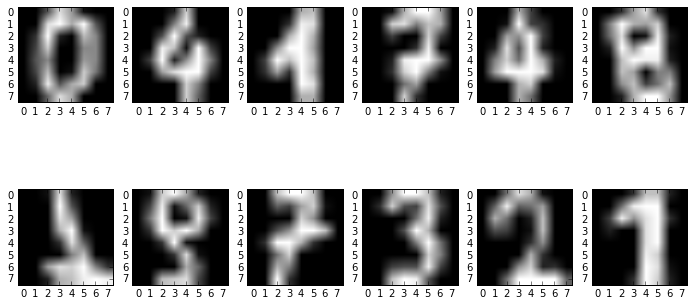

In [6]:
fig, ax = plt.subplots(2, 6, figsize = (12, 6))
for i in range(0, 6):
    ax[0, i].imshow(digits.iloc[i*100].values.reshape(8,8), cmap = 'gray')
    ax[1, i].imshow(digits.iloc[1000 + i*100].values.reshape(8,8), cmap = 'gray')

# K-Nearest Neighbors

In [38]:
def train(train, labels, k = 5):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train, labels)
    return knn

def test(model, test, test_labels):
    prediction = model.predict(test)
    accuracy = sum(prediction == test_labels)/len(prediction)
    return accuracy

def cross_validate(data, labels, k):
    kf = KFold(n_splits=4, shuffle = True, random_state = 1)
    accuracy = list()
    
    for train_index, test_index in kf.split(data):
        train_data = data.loc[train_index]
        train_labels = labels.loc[train_index]
        test_data = data.loc[test_index]
        test_labels = labels.loc[test_index]
        
        knn = train(train_data, train_labels, k)
        accuracy.append(test(knn, test_data, test_labels))
        
    return accuracy

In [39]:
cross_validate(digits, labels, k = 5)

[0.9933333333333333,
 0.9710467706013363,
 0.9866369710467706,
 0.9821826280623608]

98% of accuracy is already a very amazing result. But let's try to improve that changing the number of neighbors

In [9]:
accuracy = dict()

for k in range(1, 20):
    accuracy_list = cross_validate(digits, labels, k = k)
    mean_accuracy = np.mean(accuracy_list)
    accuracy[k] = mean_accuracy
    
accuracy

{1: 0.9827456075228903,
 2: 0.9805184360306854,
 3: 0.9855283345706509,
 4: 0.9849690670626082,
 5: 0.9832999257609502,
 6: 0.9805159613956941,
 7: 0.9821863400148477,
 8: 0.9816295471417965,
 9: 0.9788468200940361,
 10: 0.9782887899034892,
 11: 0.9771789161098738,
 12: 0.9771764414748825,
 13: 0.9755085374907201,
 14: 0.9755073001732245,
 15: 0.9749517446176689,
 16: 0.9738381588715664,
 17: 0.9705011135857461,
 18: 0.9688307349665924,
 19: 0.9693887651571393}

The best results were around of 5 neightbors

# Deep Learning

In [41]:
def train(train, labels, neurons = (8,)):
    rf = rfClassifier(hidden_layer_sizes = neurons)
    rf.fit(train, labels)
    return rf

def test(model, test, test_labels):
    prediction = model.predict(test)
    accuracy = sum(prediction == test_labels)/len(prediction)
    return accuracy

def cross_validate(data, labels, neurons):
    kf = KFold(n_splits=4, shuffle = True, random_state = 1)
    accuracy = list()
    
    for train_index, test_index in kf.split(data):
        train_data = data.loc[train_index]
        train_labels = labels.loc[train_index]
        test_data = data.loc[test_index]
        test_labels = labels.loc[test_index]
        
        rf = train(train_data, train_labels, neurons)
        accuracy.append(test(rf, test_data, test_labels))
        
    return accuracy

In [11]:
cross_validate(digits, labels, neurons = (8,))

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



[0.9066666666666666,
 0.9309576837416481,
 0.9265033407572383,
 0.9220489977728286]

With only one layer with 8 neurons the results are note great. Now we can check the result with more neurons.

In [14]:
neurons_list = [8, 16, 32, 64, 128, 256]
accuracy = dict()

for neurons in neurons_list:
    accuracy_list = cross_validate(digits, labels, neurons = (neurons,))
    mean_accuracy = np.mean(accuracy_list)
    accuracy[neurons] = mean_accuracy

accuracy 

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



{8: 0.8848020292006928,
 16: 0.9571504578074734,
 32: 0.9643763919821826,
 64: 0.9666060381093788,
 128: 0.9699430833951993,
 256: 0.9721702548874042}

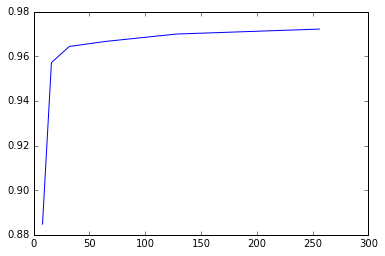

In [33]:
df_accuracy = pd.DataFrame(accuracy, index = ['accuracy']).T

plt.plot(df_accuracy.index, df_accuracy)
plt.show()

32 neurons in the first layer already get a good result with the deep learning model, after that the model is only adjusting more to the training data.

# Neural Network With Three Hidden Layers

In [45]:
neurons_list = [(10, 10, 10),
                (64, 64, 64),
                (128, 128, 128)]
accuracy = dict()

for neurons in neurons_list:
    accuracy_list = cross_validate(digits, labels, neurons = neurons)
    mean_accuracy = np.mean(accuracy_list)
    accuracy[neurons] = mean_accuracy

accuracy 

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



{(10, 10, 10): 0.9287626825043306,
 (64, 64, 64): 0.9699505073001733,
 (128, 128, 128): 0.9749542192526602}

Use more layers of neurons do not improve much in relation to only one layer with 32 neurons

# Random Forest

In [58]:
def train(train, labels, n_estimators):
    rf = RandomForestRegressor(n_estimators = 20)
    rf.fit(train, labels)
    return rf

def test(model, test, test_labels):
    prediction = model.predict(test)
    accuracy = sum(prediction == test_labels)/len(prediction)
    return accuracy

def cross_validate(data, labels, n_estimators):
    kf = KFold(n_splits=4, shuffle = True, random_state = 1)
    accuracy = list()
    
    for train_index, test_index in kf.split(data):
        train_data = data.loc[train_index]
        train_labels = labels.loc[train_index]
        test_data = data.loc[test_index]
        test_labels = labels.loc[test_index]
        
        rf = train(train_data, train_labels, n_estimators)
        accuracy.append(test(rf, test_data, test_labels))
        
    return accuracy

In [60]:
cross_validate(digits, labels, n_estimators = 5)

[0.19555555555555557,
 0.22939866369710468,
 0.22717149220489977,
 0.21603563474387527]

In [61]:
accuracy = dict()

for i in range(0, 100):
    accuracy[i] = np.mean(cross_validate(digits, labels, n_estimators = i))

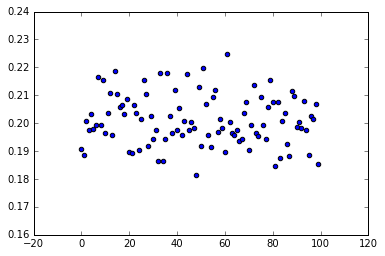

In [69]:
df_accuracy = pd.DataFrame(accuracy, index = ['accuracy']).T
plt.scatter(df_accuracy.index, df_accuracy)
plt.show()

The Random Forest Model did not apresent good results

The model that presented the best results was the K-Nearests Neighbors with accuracy close to 98%